In [97]:
#importamos la libreria pandas
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import preprocessing, cluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.cluster import Birch

import warnings
warnings.filterwarnings('ignore')

#Configuramos algunas opciones para nuestro notebook

pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
plt.style.use("ggplot")

## Carga y tratamiento de Datos


Lo primera vamos a cargar el dataset con los datos a utilizar.


In [98]:
def calculoParcialAnio(anio):

    df = pd.read_csv('datos/silver/result_datos_poblacion_economicos_idealista_inversiones_locales.csv', delimiter=';',header=0)
    
    df.loc[df.DatoParadosRegistradosHombres==' - ','DatoParadosRegistradosHombres']=np.NaN
    df.loc[df.DatoParadosRegistradosHombres=='-','DatoParadosRegistradosHombres']=np.NaN
    df.loc[df.DatoParadosRegistradosMujer==' - ','DatoParadosRegistradosMujer']=np.NaN    
    df.loc[df.DatoParadosRegistradosMujer=='-','DatoParadosRegistradosMujer']=np.NaN    



    df_features = ['DatoPoblacion',
                'DatoPoblacionMenor16',               
                'DatoPoblacionEntre16y64',              
                'DatoPoblacionMayor65',                 
                'DatoSobreEnvejecimiento',              
                'DatoSobreenvejecimientoHombres',       
                'DatoSobreenvejecimientoMujeres',       
                'DatoFeminidad',                        
                'DatoNacionalidadExtranjera',           
                'DatoParadosRegistrados',                       
                'DatoAfiliacionesTrabajo',              
                'DatoAfiliacionesTrabajoHombres',       
                'DatoAfiliacionesTrabajoMujer',         
                'DatoAfiliacionesResidencia',           
                'DatoAfiliacionesResidenciaHombres',    
                'DatoAfiliacionesResidenciaMujer',      
                'DatoAutonomo',                         
                'DatoAutonomosHombres',                 
                'DatoAutonomosMujer',                   
                'PrecioVentaEurosM2',                   
                'PrecioAlquilerEurosM2',                
                'PresupuestoGasto',                     
                'Gasto_Real',                           
                'NumeroLocales',                        
                'NumeroAlojamientos']

    anioFinal = anio

    df_parcial = df[df['Anio'].isin([2012,anioFinal])]
    df_parcial = df_parcial.fillna(0)

    for f in df_features:
    
        df_parcial[f] = np.where(df_parcial['Anio'] == 2012, df_parcial[f]*(-1), df_parcial[f])
        df_parcial[f] = df_parcial[f].astype(float)

    df_parcial = df_parcial.groupby(['CodigoBarrio','NombreBarrio']).agg(
                DatoPoblacion=('DatoPoblacion',sum),
                DatPoblacionMenor16=('DatoPoblacionMenor16',sum),
                DatPoblacionEntre16y64=('DatoPoblacionEntre16y64',sum),
                DatoPoblacionMayor65=('DatoPoblacionMayor65',sum),
                DatoSobreEnvejecimiento=('DatoSobreEnvejecimiento',sum),
                DatoSobreenvejecimientoHombres=('DatoSobreenvejecimientoHombres',sum),
                DatoSobreenvejecimientoMujeres=('DatoSobreenvejecimientoMujeres',sum),
                DatoFeminidad=('DatoFeminidad',sum),
                DatoNacionalidadExtranjera=('DatoNacionalidadExtranjera',sum),
                DatoParadosRegistrados=('DatoParadosRegistrados',sum),
                DatoAfiliacionesTrabajo=('DatoAfiliacionesTrabajo',sum),
                DatoAfiliacionesTrabajoHombres=('DatoAfiliacionesTrabajoHombres',sum),
                DatoAfiliacionesTrabajoMujer=('DatoAfiliacionesTrabajoMujer',sum),
                DatoAfiliacionesResidencia=('DatoAfiliacionesResidencia',sum),
                DatoAfiliacionesResidenciaHombres=('DatoAfiliacionesResidenciaHombres',sum),
                DatoAfiliacionesResidenciaMujer=('DatoAfiliacionesResidenciaMujer',sum),
                DatoAutonomo=('DatoAutonomo',sum),
                DatoAutonomosHombres=('DatoAutonomosHombres',sum),
                DatoAutonomosMujer=('DatoAutonomosMujer',sum),
                PrecioVentaEurosM2=('PrecioVentaEurosM2',sum),
                PrecioAlquilerEurosM2=('PrecioAlquilerEurosM2',sum),
                PresupuestoGasto=('PresupuestoGasto',sum),
                Gasto_Real=('Gasto_Real',sum),
                NumeroLocales=('NumeroLocales',sum),
                NumeroAlojamientos=('NumeroAlojamientos',sum)
    ).reset_index() 


    df_norm = df_parcial.copy()
    df_norm = df_norm.drop(columns=['NombreBarrio', 'CodigoBarrio'])
    x = df_norm.values  


    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)


    df_norm = pd.DataFrame(x_scaled)

    df_norm



    cluster = KMeans(n_clusters=8, random_state=55)
    cluster_labels = cluster.fit_predict(df_norm)

    df_result = df_parcial
    df_result['Anio'] = anio
    df_result['K_means_k8'] = cluster_labels
        

    cluster = KMeans(n_clusters=9, random_state=10)
    cluster_labels = cluster.fit_predict(df_norm)

    df_result['K_means_k9'] = cluster_labels


    birch_model = Birch(threshold=0.03, n_clusters=8)
    cluster_labels = birch_model.fit_predict(df_norm)
    df_result['Birch_8'] = cluster_labels

    birch_model = Birch(threshold=0.03, n_clusters=9)
    cluster_labels = birch_model.fit_predict(df_norm)
    df_result['Birch_9'] = cluster_labels

    return df_result







In [99]:
df_completo = pd.DataFrame()
for i in range(2013,2023,1):
    df_parcial = calculoParcialAnio(i)

    if df_completo.size==0:
        df_completo = df_parcial
    else:
        df_completo = df_completo.append(df_parcial, ignore_index=True)

df_completo

,CodigoBarrio,NombreBarrio,DatoPoblacion,DatPoblacionMenor16,DatPoblacionEntre16y64,DatoPoblacionMayor65,DatoSobreEnvejecimiento,DatoSobreenvejecimientoHombres,DatoSobreenvejecimientoMujeres,DatoFeminidad,...,PrecioAlquilerEurosM2,PresupuestoGasto,Gasto_Real,NumeroLocales,NumeroAlojamientos,Anio,K_means_k8,K_means_k9,Birch_8,Birch_9
0,11.0,Palacio,-241.0,0.21,-0.25,0.04,0.13,1.0,-0.1,-2.5,...,-0.6,-16838088.50,-10291834.36,0.0,0.0,2013,1,7,2,0
1,12.0,Embajadores,-1007.0,-0.16,0.03,0.12,0.06,0.2,0.1,0.1,...,-0.6,-16838088.50,-10291834.36,0.0,0.0,2013,4,6,4,4
2,13.0,Cortes,-53.0,-0.07,0.12,-0.04,-1.79,-1.9,-1.4,-1.8,...,-0.6,-16838088.50,-10291834.36,0.0,0.0,2013,1,7,2,0
3,14.0,Justicia,-50.0,-0.14,0.17,-0.03,-0.15,0.7,-0.5,-0.5,...,-0.6,-16838088.50,-10291834.36,0.0,0.0,2013,1,7,2,0
4,15.0,Universidad,-170.0,-0.24,0.31,-0.06,-0.05,-0.3,0.3,0.9,...,-0.6,-16838088.50,-10291834.36,0.0,0.0,2013,1,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,211.0,Alameda de Osuna,-475.0,-0.86,-8.11,8.95,7.42,13.9,2.0,1.1,...,2.4,21114924.19,4598460.60,527.0,5.0,2022,2,7,0,8
1290,212.0,Aeropuerto,-160.0,-1.09,-0.39,1.48,8.44,6.4,11.1,0.8,...,2.4,21114924.19,4598460.60,582.0,4.0,2022,5,3,7,7
1291,213.0,Casco Histórico de Barajas,-479.0,-0.25,-3.24,3.48,0.48,-0.3,1.3,3.6,...,2.4,21114924.19,4598460.60,544.0,18.0,2022,2,7,0,8
1292,214.0,Timón,2818.0,-0.13,-1.04,1.17,3.10,0.4,5.1,4.7,...,2.4,21114924.19,4598460.60,374.0,5.0,2022,0,6,6,2


## Preparación de datasets de Entrenamiento y Test

Separamos nuestro dataset en uno de Entrenamiento (75%) y otro de Test(25%). Previamente almacenamos los datos del año 2022 con los que haremos la validación de como de bueno es nuestro modelo seleccionado clasificando los datos.


In [100]:
df_datos = df_completo

#Quitamos las columnas Anio, CodigoBarrio y NombreBarrio asi como los resultados de cluster que no se van a utilizar

df_datos_final = df_datos.drop(["Anio","CodigoBarrio","NombreBarrio", "K_means_k8","K_means_k9","Birch_9"],axis=1) 


#Separamos el dataset en entrenamiento y test

from sklearn.model_selection import train_test_split
#Dividimos el dataset en 75% para entrenar los modelos y 25% para realizar test
train, test = train_test_split(df_datos_final,
                               train_size=0.75,
                               test_size=0.25,
                               )
train.head()

,DatoPoblacion,DatPoblacionMenor16,DatPoblacionEntre16y64,DatoPoblacionMayor65,DatoSobreEnvejecimiento,DatoSobreenvejecimientoHombres,DatoSobreenvejecimientoMujeres,DatoFeminidad,DatoNacionalidadExtranjera,DatoParadosRegistrados,...,DatoAutonomo,DatoAutonomosHombres,DatoAutonomosMujer,PrecioVentaEurosM2,PrecioAlquilerEurosM2,PresupuestoGasto,Gasto_Real,NumeroLocales,NumeroAlojamientos,Birch_8
1126,-538.0,-0.63,1.09,-0.46,1.19,-3.6,3.8,-1.0,-0.37,-275.0,...,338.0,198.000,140.0,0.346,2.5,7122991.71,6287917.08,1521.0,5.0,6
679,2.0,-0.10,-0.70,0.80,-1.36,-1.8,-0.8,-4.8,-1.32,-282.0,...,-96.0,-0.034,-62.0,1.451,4.6,24931987.90,6048355.20,1257.0,8.0,0
303,-130.0,-0.82,-1.52,2.34,0.70,1.6,-0.1,0.2,-2.14,-186.0,...,288.0,161.000,127.0,-0.182,0.2,-18752311.67,-153041.98,471.0,2.0,0
53,133.0,0.05,-0.62,0.57,-0.68,0.2,-1.3,0.4,0.60,-20.0,...,36.0,20.000,16.0,-0.135,-0.6,4782234.90,6213607.59,0.0,0.0,2
321,-1973.0,-0.11,-0.77,0.87,2.81,3.0,2.7,2.6,-4.74,-369.0,...,214.0,111.000,103.0,-0.224,-0.3,5133840.43,-22993.63,2015.0,0.0,2


In [101]:
test.head()

,DatoPoblacion,DatPoblacionMenor16,DatPoblacionEntre16y64,DatoPoblacionMayor65,DatoSobreEnvejecimiento,DatoSobreenvejecimientoHombres,DatoSobreenvejecimientoMujeres,DatoFeminidad,DatoNacionalidadExtranjera,DatoParadosRegistrados,...,DatoAutonomo,DatoAutonomosHombres,DatoAutonomosMujer,PrecioVentaEurosM2,PrecioAlquilerEurosM2,PresupuestoGasto,Gasto_Real,NumeroLocales,NumeroAlojamientos,Birch_8
899,3311.0,1.90,-1.48,-0.42,3.00,1.8,3.9,2.5,-1.63,-83.0,...,155.0,100.000,55.0,0.451,1.6,15812986.61,2825536.51,367.0,4.0,3
236,-1329.0,-0.28,-0.99,1.26,1.99,2.5,1.6,1.9,-3.83,-221.0,...,114.0,71.000,43.0,-0.162,-0.9,10483604.67,9325932.38,1535.0,0.0,5
345,-2848.0,-0.30,-0.67,0.96,5.31,5.6,5.2,1.6,-4.73,-503.0,...,147.0,0.047,100.0,-0.220,0.0,-8328391.45,-7862233.47,2797.0,0.0,6
1063,203.0,-0.87,0.67,0.20,-4.46,-3.5,-4.8,-1.4,-1.68,-826.0,...,392.0,218.000,174.0,0.865,3.3,-27721526.86,-10330026.53,1732.0,9.0,5
242,-340.0,0.06,0.38,-0.44,8.58,8.3,8.7,1.8,-2.06,25.0,...,24.0,16.000,8.0,-0.092,-0.9,3448427.80,3390755.83,0.0,0.0,0


## Creación de PIPELINES

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


## Regresión Logistica:

Se van a entrenar modelos de regresión logistica de la siguiente manera:

- Regresion Logistica sin ningun tipo de seleccionador de variables.
- Regresion Logistica con un seleccionador RFECV
- Regresion Logistica con un seleccionador SelectKBest

Para todos ellos utilizaremos standarizacion de tipo StandardScaler, MinMaxScaler, Normalizer y MaxAbsScaler asi como Cross Validation con k=10

In [103]:
#Regresion logistica sin seleccionador de variables:
logreg_nosel = Pipeline(steps=[("scaler",StandardScaler()),
                         ("logreg",LogisticRegression())
                        ])

grid_logreg = { 'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                "logreg__C": [0.1, 0.5, 1.0, 5.0],      # Fuerza de la regularización elegida.
                "logreg__fit_intercept": [True],        # Lo que hacemos con este parametro a TRUE es que la linea no tenga que qeu tener el origen en el (0,0)
                "logreg__max_iter": [1000],       # Indicamos el numero maximo de iteraciones que puede hacer el solver para converger.
                "logreg__solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],         #La documentación recomienda liblinear para datasets pequeños aunque probamos todas
                "logreg__penalty": ["l1","l2"],         # Probamos con l1, l2 .
                }

gs_logreg  = GridSearchCV(logreg_nosel,
                            grid_logreg,
                            cv=10,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)   

In [104]:
#Regresion logistica con seleccionador RFECV
#Elimina las features de manera recursiva utilzando Cross validation hasta obtener el mejor numero de features

logreg_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LogisticRegression())),
                               ("logreg",LogisticRegression())
                              ]
                       )
grid_logreg_rfecv = {#'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                      "rfecv__step": [1], # Probar a quitar features de una en una; lo más conservador.
                     "rfecv__cv": [10],   # Cross validation con k interna del RFECV.
                     "logreg__C": [0.1, 0.5, 1.0, 5.0], # Fuerza de la regularización elegida.
                     "logreg__fit_intercept": [True],   # Lo que hacemos con este parametro a TRUE es que la linea no tenga que qeu tener el origen en el (0,0)
                     "logreg__max_iter": [1000],  # Indicamos el numero maximo de iteraciones que puede hacer el solver para converger.
                     "logreg__solver": ["liblinear"],   # La documentación recomienda liblinear para datasets pequeños aunque probamos todas
                     "logreg__penalty": ["l1","l2"]     # Regularizaciones l1, l2 .
                    }

gs_logreg_rfecv = GridSearchCV(logreg_rfecv,
                               grid_logreg_rfecv,
                               cv=10,
                               scoring="accuracy",
                               verbose=1,
                               n_jobs=-1)   

In [105]:
#Regresión logistica con SelectKBest
#Selecciona las features teniendo en cuenta los mejores scores de K

logreg_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()),
                               ("logreg",LogisticRegression(    ))
                              ]
                       )
grid_logreg_kbest = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                     "kbest__score_func": [f_classif],      # ANOVA para seleccionar las K mejores features. Es la opción por defecto
                     "kbest__k": [1,2,3],                   # El número de features con las que quedarse (las más importantes).
                     "logreg__C": [0.1, 0.5, 1.0, 5.0],     # Fuerza de la regularización elegida.
                     "logreg__fit_intercept": [True],       # Lo que hacemos con este parametro a TRUE es que la linea no tenga que qeu tener el origen en el (0,0)
                     "logreg__max_iter": [1000],      # Indicamos el numero maximo de iteraciones que puede hacer el solver para converger. 
                     "logreg__solver": ["liblinear"],       # La documentación recomienda liblinear para datasets pequeños aunque probamos todas
                     "logreg__penalty": ["l1","l2"]         # Regularizaciones l1, l2 y none.
                    }
gs_logreg_kbest = GridSearchCV(logreg_kbest,
                               grid_logreg_kbest,
                               cv=10,
                               scoring="accuracy",
                               verbose=1,
                               n_jobs=-1)


# Arbol de decisión. 

En este caso los arboles de decisión no es necesario estandarizar. Se van a estudiar profundidades del 2 hasta 50

In [106]:
#Arbol de decisión. En este caso los arboles de decisión no es necesario estandarizar.
#Se van a estudiar profundidades del 2 hasta 50
tree = Pipeline (steps=[("tree", DecisionTreeClassifier())])

grid_tree = {"criterion":["gini", "entropy", "log_loss"],
             "splitter":["best", "random"],
             "max_features":[None,"auto", "sqrt", "log2"],
             "tree__max_depth":list(range(1,200))} # Profundidades de 1 a 51
 
gs_tree = GridSearchCV(tree,
                        grid_tree,
                        cv=10,
                        scoring="accuracy",
                        verbose=1,
                        n_jobs=-1)

# K-Nearest Neighbors
Al igual que en la regresión logistica se va a utilizar un StandarScaler para la estandarización de los datos. Se va a entrenar los siguientes casos:

- K-Nearest Neighbors sin seleccionador
- K-Nearest Neighbors con seleccionador selectKBest

En cuando a k vamos a utilizar valores impares [3,5,7,9,11]

In [107]:
#K-Nearest Neighbors sin seleccionador
neighbors = Pipeline(steps=[("scaler",StandardScaler()),
                            ("knn",KNeighborsClassifier())
                          ])

grid_neighbors = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  "knn__n_neighbors": [3,5,7,9,11],                             # Valor de la K. Se recomiendda que sean valores impares
                  "knn__weights": ["uniform","distance"],                       # Funcion de ponderacion de pesos a utilizar en la predicción 
                  "knn__algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']    # Algoritmo utilizado para calcular
                  }
gs_neighbors = GridSearchCV(neighbors,
                            grid_neighbors,
                            cv=10,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

In [108]:
#K-Nearest Neighbors con seleccionador SelectKBest
neighbors_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                                  ("kbest",SelectKBest()),
                                  ("knn",KNeighborsClassifier())
                                ]
                         )
grid_neigbors_kbest = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                       "kbest__score_func": [f_classif],
                       "kbest__k": [1,2,3],
                       "knn__n_neighbors": [3,5,7,9,11],                             # Valor de la K. Se recomiendda que sean valores impares
                       "knn__weights": ["uniform","distance"],                       # Funcion de ponderacion de pesos a utilizar en la predicción 
                       "knn__algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']    # Algoritmo utilizado para calcular
                      }

gs_neighbors_kbest = GridSearchCV(neighbors_kbest,
                                  grid_neigbors_kbest,
                                  cv=10,
                                  scoring="accuracy",
                                  verbose=1,
                                  n_jobs=-1)

# Naïve Bayes
En este modelo no se va a utilizar estandarización de las features. Se van a entrenar los siguientes modelos:

- Naïve Bayes Neighbors sin seleccionador
- Naïve Bayes Neighbors con seleccionador selectKBest


In [109]:
# Naïve Bayes sin seleccionador:

nb = Pipeline(steps=[("nb", GaussianNB())]) 

gs_nb = GridSearchCV(nb,
                     {},  # En este caso no tenemos grid
                     cv=10,
                     scoring="accuracy",
                     verbose=2,
                     n_jobs=-1)

In [110]:
# Naïve Bayes con seleccionador SelectKBest:
nb_kbest = Pipeline(steps=[("kbest",SelectKBest()),
                           ("nb",GaussianNB())])



grid_nb_kbest = {"kbest__score_func": [f_classif],
                 "kbest__k": [1,2,3]
                }

gs_nb_kbest = GridSearchCV(nb_kbest,
                           grid_nb_kbest,
                           cv=10,
                           scoring="accuracy",
                           verbose=1,
                           n_jobs=-1)

## Support Vector Machines

Para los modelos de SVM se van a entrenar con multiples combinaciones de los parametros C, Kernel, degree y Gamma. De igual manera se realizaran dos Pipelines:

- SVM sin seleccionador de features.
- SVM con un seleccionador SelectKBest.

En ambos casos se utilizara un StandardScaler para normalizar variables.

In [111]:
#SVM sin seleccionador de features
svm = Pipeline(steps=[("scaler",StandardScaler()),
                      ("svm",SVC())]
              )
grid_svm = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
            "svm__C": [0.01, 0.1, 0.5, 1.0],
            "svm__kernel": ["linear","rbf"],
            "svm__degree": [2,3,4,5],
            "svm__gamma": [0.001, 0.1, "auto", 1.0, 10.0, 30.0]
           }
gs_svm = GridSearchCV(svm,
                      grid_svm,
                      cv=10,
                      scoring="accuracy",
                      verbose=1,
                      n_jobs=-1)

In [112]:
#SVM con seleccionador SelectKbest
svm_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                            ("kbest",SelectKBest()),
                            ("svm",SVC())])
grid_svm_kbest = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
                  "kbest__score_func": [f_classif],
                  "kbest__k": [1,2,3],
                  "svm__C": [0.01, 0.1, 0.5, 1.0],
                  "svm__kernel": ["linear","rbf"],
                  "svm__degree": [2,3,4,5],
                  "svm__gamma": [ 0.1, 1.0, 10.0]
                 }
gs_svm_kbest = GridSearchCV(svm_kbest,
                            grid_svm_kbest,
                            cv=10,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

## Random Forest

Vamos a entrenar un random forest con multiples configuraciones. En este caso no es necesario estandarizar ni seleccionar variables, por lo tanto no vamos a usar un Pipeline para configurarlo.
 

In [113]:
#Random Forest
#En este caso no se utilliza Pipeline puesto que no 
random_forest = RandomForestClassifier()
grid_random_forest = {"n_estimators": [100,150,200,250,300,350,400,450,500,1000],    # Numero de arboles 
                      "criterion":["gini","entropy","log_loss"],       # Función para medir la calida de los splits
                      "max_depth": [None,3,5,10,15,20,50,100],          # Profundidades de los arboles
                      "max_features": ["sqrt", "log2", 3, 4]       # Cuántas features "contempla" cada split de cada árbol.
                                                
                     }
gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=10,
                                scoring="accuracy",
                                verbose=1,
                                n_jobs=-1)

## Gradient boosting

In [114]:

#Gradient Boosting Tree
gradient_boosting = GradientBoostingClassifier()

grid_gradient_boosting = {"loss": ["log_loss","exponential"],   # La loss function que queremos optimizar
                          "learning_rate": [0.05, 0.1, 0.5],    # A más alta más aportará cada nuevo árbol,
                          "n_estimators": [250,300,350],  # Numero de arboles
                          "max_depth": [1,3,5],             # Profundidad de los arboles, mucha profundidad puede sobrestimar en este caso
                          "subsample": [1.0, 0.8, 0.5],         # Para valores < 1.0, cada nuevo arbolito entrenará solo con el porcentaje del training set especificado
                          "max_features": [None, "sqrt", "log2"]       # Cuántas features "contempla" cada split de cada árbol.
                            
                         }

gs_gradient_boosting = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=10,
                                    scoring="accuracy",
                                    verbose=1,
                                    n_jobs=-1)

Creamos un diccionario con todos los GridSearchCV 

In [115]:

todos_los_grid_searchs = {"gs_gradient_boosting":gs_gradient_boosting ,
                            "gs_random_forest":gs_random_forest,
                            "gs_logreg":gs_logreg,
                            "gs_logreg_rfecv":gs_logreg_rfecv,
                            "gs_logreg_kbest":gs_logreg_kbest,
                            "gs_neighbors ":gs_neighbors ,
                            "gs_neighbors_kbest":gs_neighbors_kbest,
                            "gs_nb":gs_nb,
                            "gs_nb_kbest":gs_nb_kbest,
                            "gs_svm":gs_svm,
                            "gs_svm_kbest":gs_svm_kbest
                          }
len(todos_los_grid_searchs)

11

In [116]:
list(train.columns.values)

['DatoPoblacion',
 'DatPoblacionMenor16',
 'DatPoblacionEntre16y64',
 'DatoPoblacionMayor65',
 'DatoSobreEnvejecimiento',
 'DatoSobreenvejecimientoHombres',
 'DatoSobreenvejecimientoMujeres',
 'DatoFeminidad',
 'DatoNacionalidadExtranjera',
 'DatoParadosRegistrados',
 'DatoAfiliacionesTrabajo',
 'DatoAfiliacionesTrabajoHombres',
 'DatoAfiliacionesTrabajoMujer',
 'DatoAfiliacionesResidencia',
 'DatoAfiliacionesResidenciaHombres',
 'DatoAfiliacionesResidenciaMujer',
 'DatoAutonomo',
 'DatoAutonomosHombres',
 'DatoAutonomosMujer',
 'PrecioVentaEurosM2',
 'PrecioAlquilerEurosM2',
 'PresupuestoGasto',
 'Gasto_Real',
 'NumeroLocales',
 'NumeroAlojamientos',
 'Birch_8']

A continuación, se lanza cada grid interando sobre el diccionario creado

In [117]:
%%time
from IPython.display import clear_output

df_features = ['DatoPoblacion',
                'DatPoblacionMenor16',
                'DatPoblacionEntre16y64',
                'DatoPoblacionMayor65',
                'DatoSobreEnvejecimiento',
                'DatoSobreenvejecimientoHombres',
                'DatoSobreenvejecimientoMujeres',
                'DatoFeminidad',
                'DatoNacionalidadExtranjera',
                'DatoParadosRegistrados',
                'DatoAfiliacionesTrabajo',
                'DatoAfiliacionesTrabajoHombres',
                'DatoAfiliacionesTrabajoMujer',
                'DatoAfiliacionesResidencia',
                'DatoAfiliacionesResidenciaHombres',
                'DatoAfiliacionesResidenciaMujer',
                'DatoAutonomo',
                'DatoAutonomosHombres',
                'DatoAutonomosMujer',
                'PrecioVentaEurosM2',
                'PrecioAlquilerEurosM2',
                'PresupuestoGasto',
                'Gasto_Real',
                'NumeroLocales',
                'NumeroAlojamientos']


train.columns = pd.MultiIndex.from_tuples(list(zip(["features"]*25, df_features))
                                                 + [("label","Birch_9")])


for nombre, grid_search in todos_los_grid_searchs.items():
    clear_output(wait=True)
    print("Haciendo Grid Search de %s..." % nombre)
    print("--------------------------------------------------------------------------------------")
    grid_search.fit(train['features'], np.ravel(train["label"]))

Haciendo Grid Search de gs_svm_kbest...
--------------------------------------------------------------------------------------
Fitting 10 folds for each of 1152 candidates, totalling 11520 fits
CPU times: user 1min 51s, sys: 3.86 s, total: 1min 55s
Wall time: 1h 13min 16s


In [118]:
mejor_score_de_cada_gridsearch = [(nombre_modelo, grid_search.best_score_) # Generamos una tupla
                                  for nombre_modelo, grid_search           # por cada par clave-valor
                                  in todos_los_grid_searchs.items()]       # del diccionario

mejor_score_de_cada_gridsearch

[('gs_gradient_boosting', 0.6814432989690722),
 ('gs_random_forest', 0.6185567010309277),
 ('gs_logreg', 0.3649484536082474),
 ('gs_logreg_rfecv', 0.356701030927835),
 ('gs_logreg_kbest', 0.25257731958762886),
 ('gs_neighbors ', 0.6030927835051546),
 ('gs_neighbors_kbest', 0.5742268041237113),
 ('gs_nb', 0.22783505154639175),
 ('gs_nb_kbest', 0.15257731958762888),
 ('gs_svm', 0.5474226804123712),
 ('gs_svm_kbest', 0.2824742268041237)]

In [119]:
mejor_score_de_cada_gridsearch_df = pd.DataFrame(mejor_score_de_cada_gridsearch,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_score_de_cada_gridsearch_df_ordenado = (mejor_score_de_cada_gridsearch_df
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_score_de_cada_gridsearch_df_ordenado

,GridSearchCV,Mejor score
0,gs_gradient_boosting,0.681443
1,gs_random_forest,0.618557
5,gs_neighbors,0.603093
6,gs_neighbors_kbest,0.574227
9,gs_svm,0.547423
2,gs_logreg,0.364948
3,gs_logreg_rfecv,0.356701
10,gs_svm_kbest,0.282474
4,gs_logreg_kbest,0.252577
7,gs_nb,0.227835


In [120]:
mejor_gridsearch = todos_los_grid_searchs["gs_gradient_boosting"]

mejor_clasificador = mejor_gridsearch.best_estimator_
mejor_clasificador

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=300,
                           subsample=0.8)

In [121]:
import pickle

# Para exportar, usamos pickle.dump:
with open("mejor_clasificador_barriosMadrid.model", "wb") as archivo_salida:
    pickle.dump(mejor_clasificador, archivo_salida)

In [122]:
import pickle
with open("mejor_clasificador_barriosMadrid.model", "rb") as archivo_entrada:
    mejor_clasificador = pickle.load(archivo_entrada)
mejor_clasificador

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=300,
                           subsample=0.8)

Una vez decidido que nuestro mejor modelo es el Gradient Booster con los hiperparametros indicados anteriormente vamos a entrenar nuestro modelo con el conjunto de entrenamiento completo.

In [123]:
mejor_clasificador.fit(train["features"],np.ravel(train["label"]))

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=300,
                           subsample=0.8)

## Mediciones sobre el conjunto del test

Una vez entrenado el modelo calculamos diferentes metricas que nos permita valorar el modelo con los resultados obtenido sobre el conjunto de test

La primera de las metricas que calculamos es el accuracy.

In [124]:
from sklearn.metrics import accuracy_score

test.columns = pd.MultiIndex.from_tuples(list(zip(["features"]*25, df_features))
                                                 + [("label","Birch_9")])


accuracy_en_test = accuracy_score(y_true = test["label"],
                                  y_pred = mejor_clasificador.predict(test["features"])
                                 )

print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.6604938271604939


In [125]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_true = test["label"],
                                    y_pred = mejor_clasificador.predict(test["features"])
                                   )

matriz_confusion

array([[56,  0,  7,  1,  2,  1,  3,  0],
       [ 4, 18,  5,  3,  4,  0,  1,  0],
       [10,  1, 47,  5,  3,  2,  5,  2],
       [ 0,  0,  5, 12,  6,  1,  0,  1],
       [ 0,  2,  4,  1, 31,  0,  3,  1],
       [ 4,  0,  2,  0,  0, 26,  0,  0],
       [ 3,  0,  5,  1,  1,  2, 17,  3],
       [ 0,  0,  2,  3,  0,  0,  1,  7]])

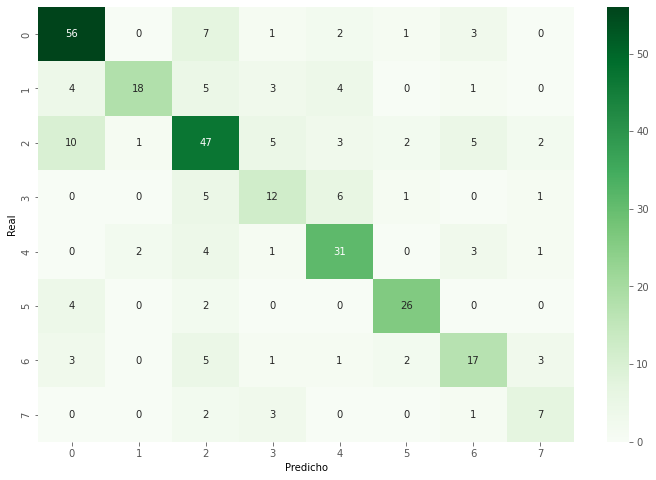

In [126]:
matriz_confusion_df = pd.DataFrame(matriz_confusion)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicho"
matriz_confusion_df.index.name = "Real"


plt.figure(figsize=(12,8))
sns.heatmap(matriz_confusion_df,                     
            annot=True,                     
            cmap="Greens",
            fmt ="d")
pass

Presentamos como metricas de precision, recall y F1-score obtenido en nuestro modelo seleccionado.

In [127]:
from sklearn.metrics import roc_curve

roc = roc_curve(
    y_true=test["label"],
    y_score=mejor_clasificador.predict(X=test[["features"]]),
    pos_label=1.0,  # Le decimos a roc_curve que los casos positivos son los unos.
)

roc

(array([0.        , 0.04844291, 0.14878893, 0.25951557, 0.4083045 ,
        0.48788927, 0.73702422, 0.74740484, 1.        ]),
 array([0.        , 0.        , 0.02857143, 0.02857143, 0.14285714,
        0.22857143, 0.37142857, 0.88571429, 1.        ]),
 array([8, 7, 6, 5, 4, 3, 2, 1, 0]))

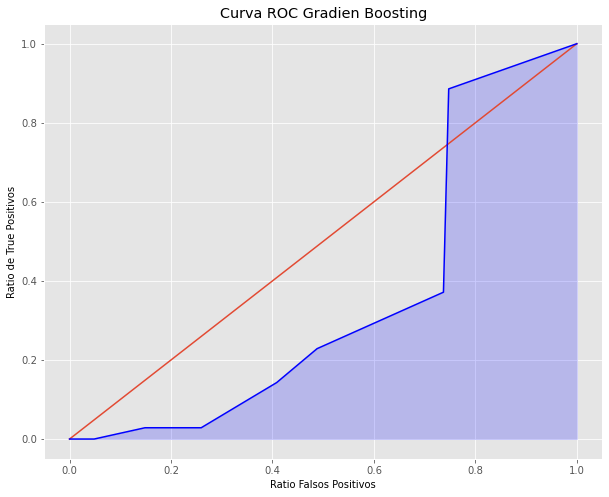

In [128]:
coordenadas_fpr = roc[0]
coordenadas_tpr = roc[1]

plt.figure(figsize=(10, 8))

# Primero pintamos el random guess:
plt.plot([0, 1], [0, 1])

# Y ahora el FPR y TPR de nuestro modelo:
plt.plot(coordenadas_fpr, coordenadas_tpr, "blue")

# Coloreamos el área bajo la curva
plt.fill_between(coordenadas_fpr, coordenadas_tpr, alpha=0.2, color="blue")

plt.title("Curva ROC Gradien Boosting")
plt.xlabel("Ratio Falsos Positivos")
plt.ylabel("Ratio de True Positivos")
pass